# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цель практической работы

Научиться работать с аномалиями в данных, строить визуализации, а также выявлять зависимости между переменными с помощью библиотеки Matplotlib.

## Что входит в практическую работу

1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графики для количественных переменных.
4. Построить графики для категориальных переменных.
5. Исследовать зависимости в данных.

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется.
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
# Импортируйте необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [3]:
# Ваш код здесь
df = pd.read_csv('/content/drive/MyDrive/SkillBox/MatPlotLib/vehicles_dataset_upd.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date'],
      dtype='object')

2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

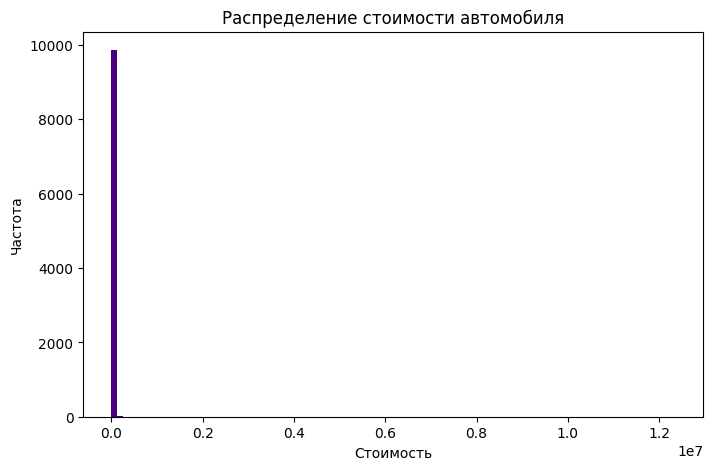

In [ ]:
# Ваш код здесь
plt.figure(figsize=(8,5))
plt.hist(df.price, bins=100, color='indigo')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля');

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

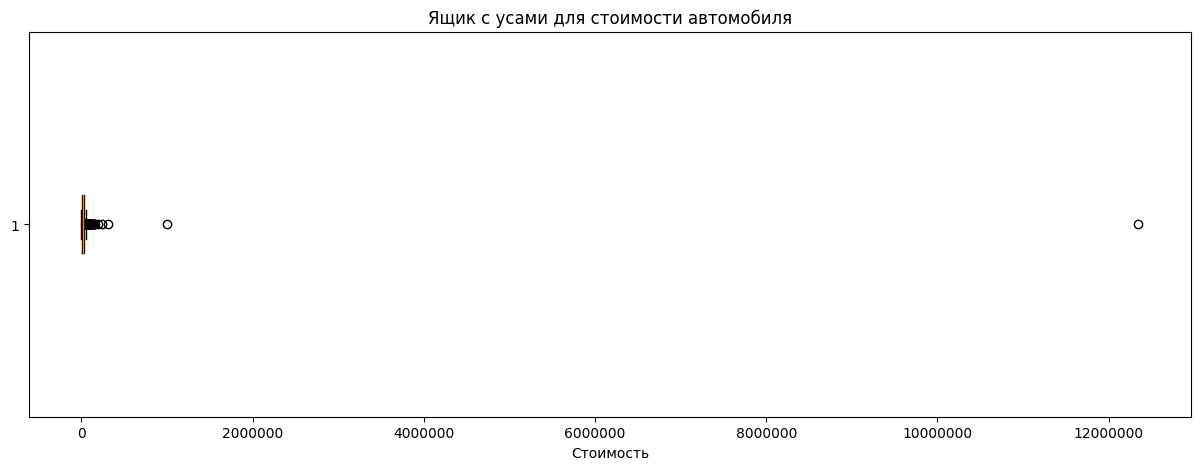

In [ ]:
# Ваш код здесь
fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(df.price, vert = False)
ax.set_xlabel('Стоимость')
ax.set_title('Ящик с усами для стоимости автомобиля')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [ ]:
# Ваш код здесь
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [4]:
# Ваш код здесь
def get_boundaries_outliers_3sigma (data):
    qntl_25 = data.quantile(.25)
    qntl_75 = data.quantile(.75)
    boundaries = (qntl_25 - 1.5*(qntl_75 - qntl_25), \
                  qntl_75 + 1.5*(qntl_75 - qntl_25))
    return boundaries

In [5]:
boundaries = get_boundaries_outliers_3sigma (df.price)
boundaries

(-22485.0, 58275.0)

In [ ]:
df.price.min()

500

In [ ]:
df.price.max()

12345678

Минимальное значение входит в интервал между полученными границами, а вот максимальное (= 12345678) - нет.

6. Посчитайте и выведете количество выбросов в стоимости автомобиля.

In [ ]:
# Ваш код здесь
is_outliers = (df.price < boundaries[0]) | (df.price > boundaries[1])
is_outliers.value_counts()

False    9661
True      207
Name: price, dtype: int64

7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [ ]:
# Ваш код здесь
df_outlier = df[df.price > boundaries[1]].sort_values('price', ascending= False)
df_outlier

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
6239,7302112231,https://akroncanton.craigslist.org/ctd/d/canto...,akron / canton,https://akroncanton.craigslist.org,12345678,2019,chevrolet,other,gas,100000,clean,automatic,https://images.craigslist.org/00F0F_g6k0zWbump...,"WE HAVE MOVED TO 2517 FULTON DRIVE NW CANTON, ...",oh,40.846500,-81.440800,2021-04-05T12:26:23-0400,high,2021-04-05 16:26:23+00:00
9663,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,283995,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00
5585,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,high,2021-04-28 19:49:25+00:00
290,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22T09:38:59-0700,high,2021-04-22 16:38:59+00:00
6035,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,high,2021-05-01 15:48:44+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,7313452917,https://austin.craigslist.org/ctd/d/salem-2016...,austin,https://austin.craigslist.org,58670,2016,chevrolet,other,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,tx,44.927304,-123.030322,2021-04-27T13:33:32-0500,high,2021-04-27 18:33:32+00:00
8050,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15T08:58:48-0500,high,2021-04-15 13:58:48+00:00
934,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-24T20:46:06-0700,high,2021-04-25 03:46:06+00:00
4783,7308933629,https://omaha.craigslist.org/cto/d/cortland-20...,omaha / council bluffs,https://omaha.craigslist.org,58500,2008,chevrolet,corvette,gas,11000,clean,manual,https://images.craigslist.org/00P0P_kxzGxZwBY9...,2008 Corvette Z06 Wil Cooksey Edition Car nu...,ia,40.445488,-96.713695,2021-04-18T15:53:04-0500,high,2021-04-18 20:53:04+00:00


In [ ]:
df_outlier_count_manufacturer = (
          df_outlier
          .groupby(['manufacturer','price_category'])['price_category']# группируем датафрейм по производителю авто
          .agg(count_manufacturer='count') #в полученных группах считаем количество и записываем в новый столбец count_manufacturer
          .reset_index()
)
df_outlier_count_manufacturer

,manufacturer,price_category,count_manufacturer
0,audi,high,6
1,bmw,high,4
2,cadillac,high,3
3,chevrolet,high,43
4,chrysler,high,1
5,dodge,high,4
6,ferrari,high,3
7,ford,high,62
8,gmc,high,13
9,honda,high,1


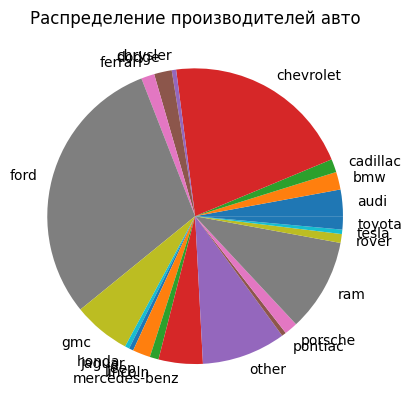

In [ ]:
plt.pie(df_outlier_count_manufacturer['count_manufacturer'], labels=df_outlier_count_manufacturer['manufacturer'])
plt.title("Распределение производителей авто")
plt.show();

Данные выбросы представляют собой уникальные машинки. Сюда входят люксовые производители ferrari, lamborgini, porsche, tesla и т.д. Видимо это эксклюзивные авто и их стоит рассматривать как отдельную категорию (Luxe).

8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [ ]:
# Ваш код здесь
df_outlier.head(15)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
6239,7302112231,https://akroncanton.craigslist.org/ctd/d/canto...,akron / canton,https://akroncanton.craigslist.org,12345678,2019,chevrolet,other,gas,100000,clean,automatic,https://images.craigslist.org/00F0F_g6k0zWbump...,"WE HAVE MOVED TO 2517 FULTON DRIVE NW CANTON, ...",oh,40.846500,-81.440800,2021-04-05T12:26:23-0400,high,2021-04-05 16:26:23+00:00
9663,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,283995,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00
5585,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,high,2021-04-28 19:49:25+00:00
290,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22T09:38:59-0700,high,2021-04-22 16:38:59+00:00
6035,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,high,2021-05-01 15:48:44+00:00
9042,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020,mercedes-benz,other,other,6318,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,45.494265,-122.579192,2021-04-14T11:26:24-0500,high,2021-04-14 16:26:24+00:00
8720,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006,other,Peterbilt 378,diesel,1234,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,30.364900,-97.682700,2021-04-27T21:01:28-0500,high,2021-04-28 02:01:28+00:00
4183,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015,mercedes-benz,sprinter 3500 airs,diesel,49291,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,45.382346,-122.605132,2021-05-03T11:04:09-0700,high,2021-05-03 18:04:09+00:00
8904,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017,other,Mclaren 570GT W/ Upgrades,gas,13000,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,32.790400,-96.804400,2021-04-30T08:20:20-0700,high,2021-04-30 15:20:20+00:00
6471,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018,mercedes-benz,maybach s560,gas,6000,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,28.463700,-81.394800,2021-04-25T12:58:01-0400,high,2021-04-25 16:58:01+00:00


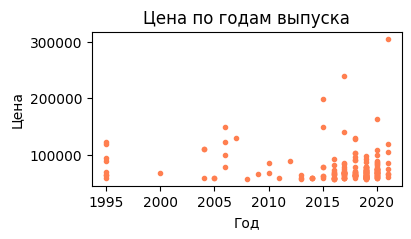

In [ ]:
# удалил две машинки с ценою >= 10^6
plt.figure(figsize=(4,2))
plt.plot(df_outlier.year[2:],df_outlier.price[2:], '.',color='coral')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Цена по годам выпуска');

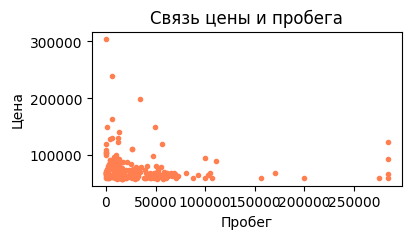

In [ ]:
# удалил две машинки с ценою >= 10^6
plt.figure(figsize=(4,2))
plt.plot(df_outlier.odometer[2:],df_outlier.price[2:], '.',color='coral')
plt.xlabel('Пробег')
plt.ylabel('Цена')
plt.title('Связь цены и пробега');

9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

*Подсказка*: обратите внимание на оператор "~" (тильда) при фильтрации исходного датафрейма. Это операция not, которая часто применяется для инвертирования логических значений. Советуем заглянуть в [документацию](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), чтобы получить представление о его работе на примерах использования.

In [6]:
# Ваш код здесь
df_new = df[~(df.price > boundaries[1])].copy(deep = True)
df_new

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9864,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9865,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9866,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [ ]:
# Ваш код здесь
df_new_years_mean_distance = (
    df_new
    .groupby('year')['odometer']# группируем датафрейм по состоянию авто
    .agg(mean_distance='mean') #в полученных группах считаем среднее по количеству пройденных миль (odometr) и записываем в новый столбец mean_distance

    .reset_index()
)
df_new_years_mean_distance

,year,mean_distance
0,1995,84209.455847
1,1996,123767.400000
2,1997,174208.909091
3,1998,147816.545455
4,1999,155608.135802
5,2000,159319.512821
6,2001,146789.827869
7,2002,147723.644295
8,2003,161387.708108
9,2004,145820.552885


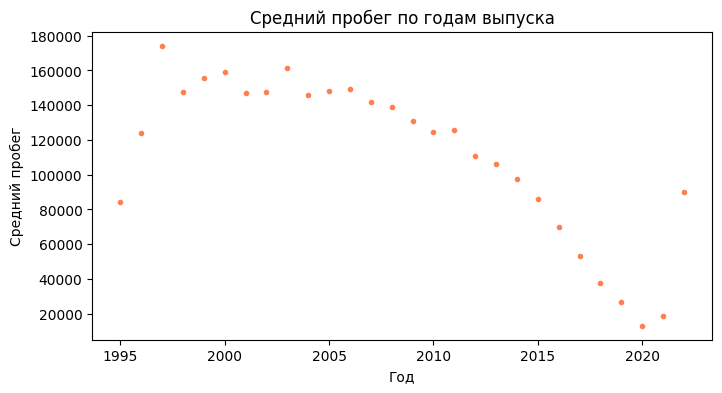

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df_new_years_mean_distance.year,df_new_years_mean_distance.mean_distance, '.',color='coral')
plt.xlabel('Год')
plt.ylabel('Средний пробег')
plt.title('Средний пробег по годам выпуска');

In [ ]:
df_new_years_mean_price = (
    df_new
    .groupby('year')['price']# группируем датафрейм по состоянию авто
    .agg(mean_price='mean') #в полученных группах считаем среднее по цене и записываем в новый столбец mean_price

    .reset_index()
)
df_new_years_mean_price

,year,mean_price
0,1995,13219.472554
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,7614.410256
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,7684.105769


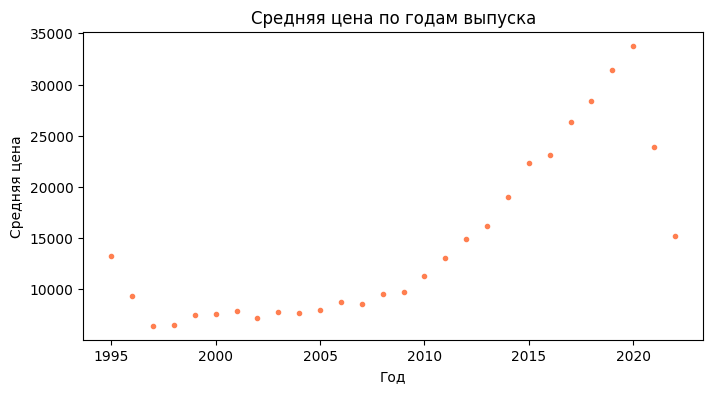

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df_new_years_mean_price.year,df_new_years_mean_price.mean_price, '.',color='coral')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по годам выпуска');

In [ ]:
# объединяем два новых датафрейма со средними значениями цены и пробега в один
df_new_mean_price_odometer = df_new_years_mean_price.merge(df_new_years_mean_distance, how = 'inner', left_on = 'year', right_on= 'year')
df_new_mean_price_odometer

,year,mean_price,mean_distance
0,1995,13219.472554,84209.455847
1,1996,9362.960000,123767.400000
2,1997,6441.250000,174208.909091
3,1998,6528.672727,147816.545455
4,1999,7446.641975,155608.135802
5,2000,7614.410256,159319.512821
6,2001,7852.090164,146789.827869
7,2002,7173.798658,147723.644295
8,2003,7767.962162,161387.708108
9,2004,7684.105769,145820.552885


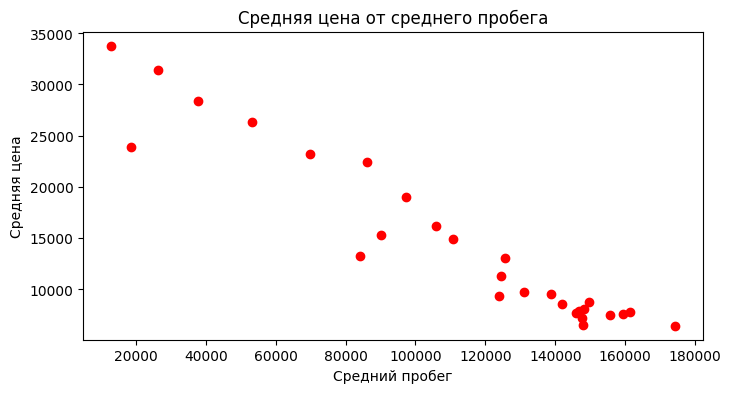

In [ ]:
# Ваш код здесь
plt.figure(figsize=(8,4))
plt.plot(df_new_mean_price_odometer.mean_distance,df_new_mean_price_odometer.mean_price, 'ro')
plt.xlabel('Средний пробег')
plt.ylabel('Средняя цена')
plt.title('Средняя цена от среднего пробега');

Из графика можно сделать вывод о ниспадающем тренде: чем больше пробег автомобиля, тем ниже его цена.

In [ ]:
df_new_mean_price_odometer['mean_distance'].corr(df_new_mean_price_odometer['mean_price'])

-0.957375045175956

Коэффициент корреляции Пирсона = - 0.96 говорит о практически обратной линейной зависимости средней цены от среднего пробега

2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

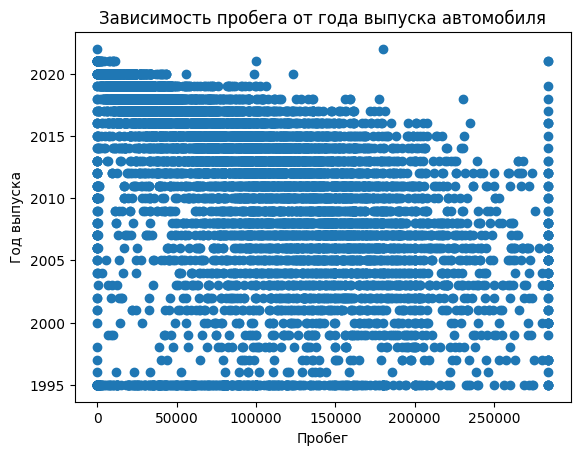

In [ ]:
# Ваш код здесь
plt.figure()
plt.scatter(df_new['odometer'], df_new['year'])
plt.title("Зависимость пробега от года выпуска автомобиля")
plt.xlabel('Пробег')
plt.ylabel('Год выпуска')

plt.show();

3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [ ]:
# Ваш код здесь
df_new_year_count = (
    df_new
    .groupby('year')['manufacturer']# группируем датафрейм по состоянию авто
    .agg(count_year ='count') #в полученных группах считаем среднее по количеству пройденных миль (odometr) и записываем в новый столбец mean_distance

    .reset_index()
)
df_new_year_count

,year,count_year
0,1995,419
1,1996,25
2,1997,44
3,1998,55
4,1999,81
5,2000,78
6,2001,122
7,2002,149
8,2003,185
9,2004,208


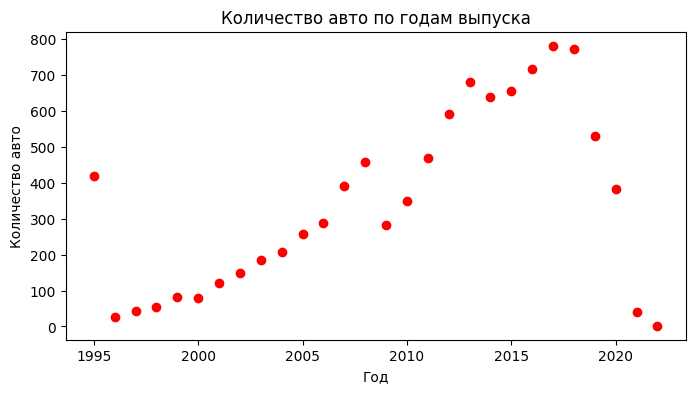

In [ ]:
# Ваш код здесь
plt.figure(figsize=(8,4))
plt.plot(df_new_year_count.year,df_new_year_count.count_year , 'ro')
plt.xlabel('Год')
plt.ylabel('Количество авто')
plt.title('Количество авто по годам выпуска');

4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [ ]:
# Ваш код здесь
df_new = df_new[df_new['year'] < 2021]
df_new

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,clean,other,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9864,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9865,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9866,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [ ]:
# Ваш код здесь
df_new_years_mean_price = (
    df_new
    .groupby('year')['price']# группируем датафрейм по состоянию авто
    .agg(mean_price='mean') #в полученных группах считаем среднее по цене и записываем в новый столбец mean_price

    .reset_index()
)
df_new_years_mean_price

,year,mean_price
0,1995,13219.472554
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,7614.410256
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,7684.105769


6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

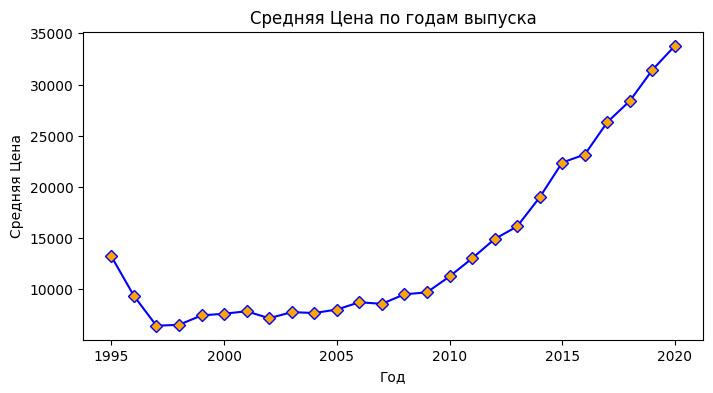

In [ ]:
# Ваш код здесь
plt.figure(figsize=(8,4))
plt.plot(df_new_years_mean_price.year,df_new_years_mean_price.mean_price, marker = 'D', markerfacecolor = 'orange',color='blue')
plt.xlabel('Год')
plt.ylabel('Средняя Цена')
plt.title('Средняя Цена по годам выпуска');

7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: Линейная связь стоимости от года не очевидна. Однако можно говорить о сильной линейной связи средней стоимости и года выпуска, поскольку коэффициент корреляции = 0.85

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: Сильной связи нет, поскольку значение коэффициента чуть больше 0.55

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: Линейная связь прямая т.е. чем ранее выпущена машинка, тем меньше её стоимость

In [ ]:
# коэффициент корреляции Пирсона для средней стоимости авто и года выпуска
df_new_years_mean_price.year.corr(df_new_years_mean_price.mean_price)

0.8451320087414737

In [ ]:
# коэффициент корреляции Пирсона для стоимости авто и года выпуска
df_new['year'].corr(df_new['price'])

0.5517189388950716

8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

Text(0.5, 1.0, 'Распределение стоимости автомобиля')

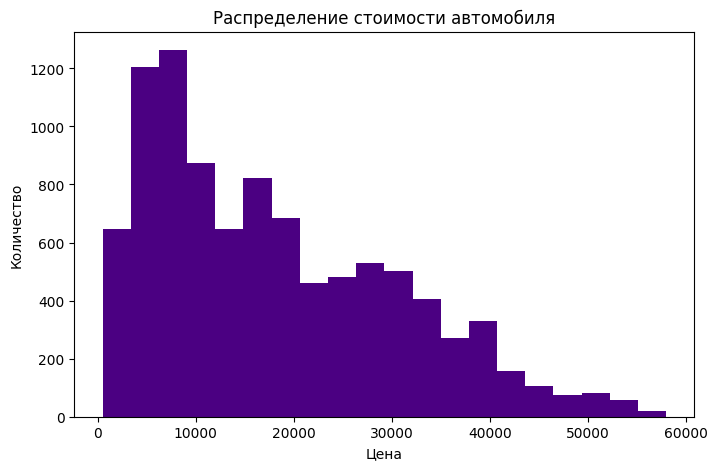

In [ ]:
# Ваш код здесь
plt.figure(figsize=(8, 5))
plt.hist(df_new['price'], bins=20, color='indigo')
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.title('Распределение стоимости автомобиля')


9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [ ]:
# Ваш код здесь
# сохраним обновленный датафрейм в файл
df_new.to_csv('/content/drive/MyDrive/SkillBox/data/vehicles_dataset_upd2.csv')

### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории.

Подумайте, почему полученный график так выглядит?


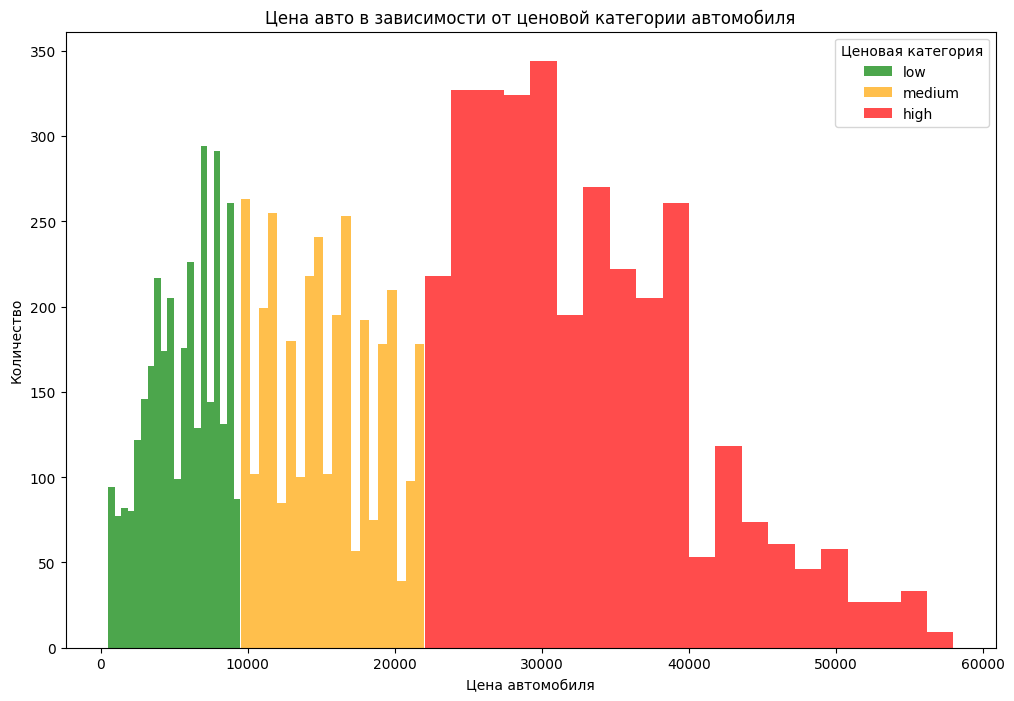

In [ ]:
# Ваш код здесь
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.hist(data['price'], bins=20, color=color, alpha=0.7)

plt.ylabel('Количество')
plt.xlabel('Цена автомобиля')
plt.title('Цена авто в зависимости от ценовой категории автомобиля')
plt.legend(colors, title="Ценовая категория");

2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу.

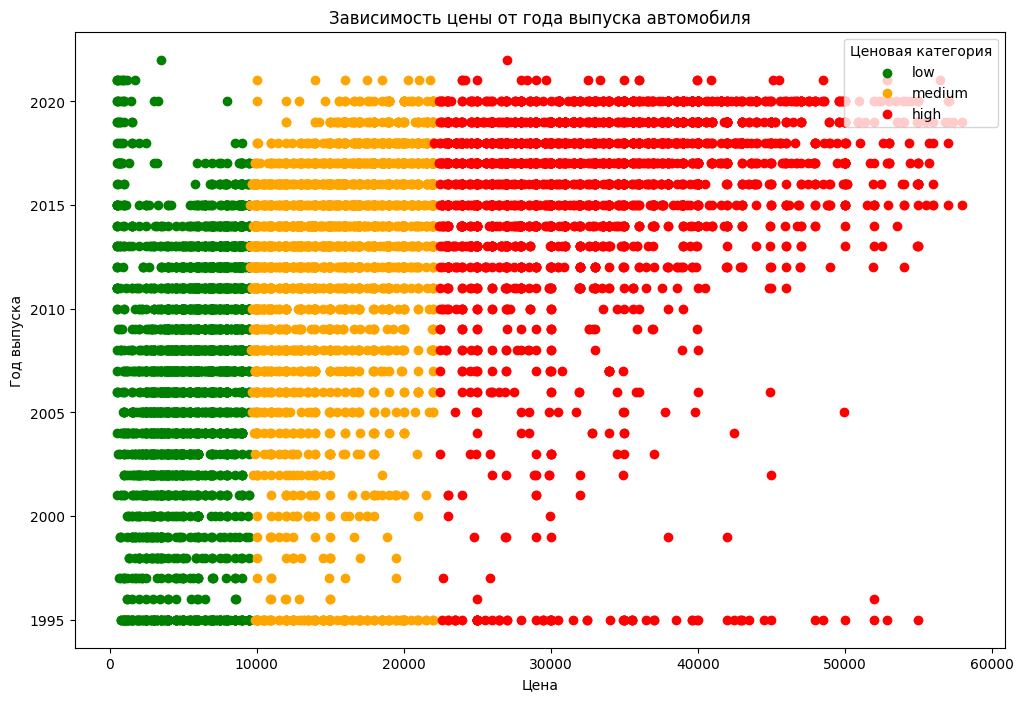

In [7]:
# Ваш код здесь
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.scatter(data['price'], data['year'], c=color, label=price_category)

ax.legend(loc='upper right', title="Ценовая категория")
plt.title("Зависимость цены от года выпуска автомобиля")
plt.xlabel('Цена')
plt.ylabel('Год выпуска')
plt.show()

### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [ ]:
# Ваш код здесь
df_new_count_manufacturer = (
    df_new
    .groupby('manufacturer')['manufacturer']# группируем датафрейм по производителю авто
    .agg(count_manufacturer ='count') #в полученных группах считаем количество и записываем в новый столбец count_manufacturer

    .reset_index()
)
df_new_count_manufacturer

,manufacturer,count_manufacturer
0,acura,149
1,alfa-romeo,13
2,audi,193
3,bmw,307
4,buick,144
5,cadillac,176
6,chevrolet,1239
7,chrysler,159
8,datsun,2
9,dodge,321


2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

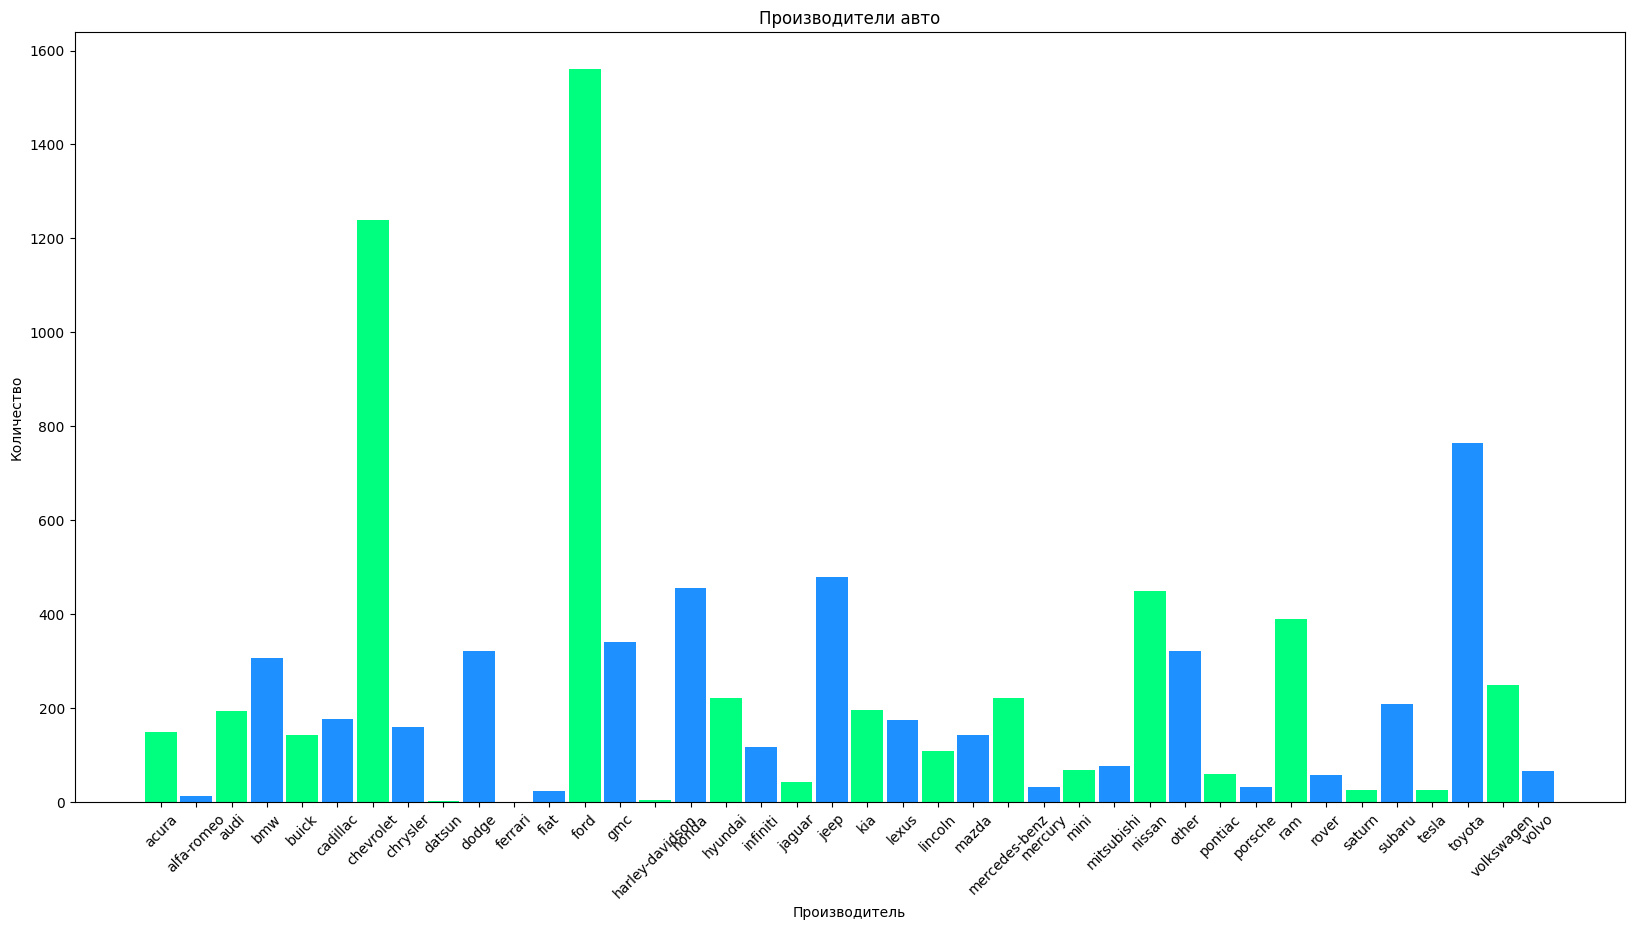

In [ ]:
# Ваш код здесь
plt.figure(figsize=(20, 10))
plt.bar(df_new_count_manufacturer['manufacturer'], df_new_count_manufacturer['count_manufacturer'], width = 0.9, color=['springgreen', 'dodgerblue'])
plt.xlabel('Производитель')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.title('Производители авто');

3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [ ]:
# Ваш код здесь
df_new_count_transmission = (
    df_new
    .groupby('transmission')['manufacturer']# группируем датафрейм по производителю авто
    .agg(count_transmission ='count') #в полученных группах считаем количество и записываем в новый столбец count_manufacturer

    .reset_index()
)
df_new_count_transmission

,transmission,count_transmission
0,automatic,7363
1,manual,612
2,other,1644


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


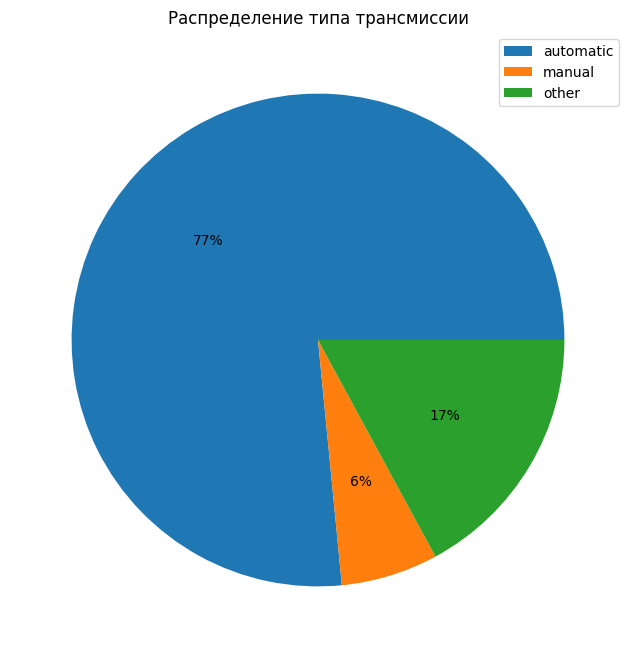

In [ ]:
# Ваш код здесь
plt.figure(figsize=(12, 8))
plt.pie(df_new_count_transmission['count_transmission'], labels=df_new_count_transmission['transmission'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение типа трансмиссии")
plt.legend()
plt.show();